In [ ]:
    import csv
    from homologs import paralogs
    ohnologs=set()
    with open('./hsapiens.Pairs.Strict.2R.txt') as file:
        for orow in csv.DictReader(file, delimiter='\t'):
            ohnologs.add(orow['Ohno1'])
            ohnologs.add(orow['Ohno2'])
    

In [4]:
import csv
from collections import namedtuple
para = namedtuple('paralog', ['lgene', 'rgene', 'branch_point', 'species', 'dn', 'ds'])
i=0
ohnologs={}
with open('./hsapiens.Pairs.Strict.2R.txt') as file:
    for orow in csv.DictReader(file, delimiter='\t'):
        ohnologs[(orow['Ohno1'], orow['Ohno2'])] = 'Unknown'
    
with open('/data/db/within_species_paralogs_dnds.csv') as file:
    for p in (para(l['lgene'], l['rgene'], l['branch_point'], l['species'], None, None) for l in csv.DictReader(file, fieldnames=['lgene', 'rgene', 'branch_point', 'species', 'dn', 'ds'], quotechar='"')):
        if p.species != '9606':
            continue
        if (p.lgene, p.rgene) in ohnologs:
            ohnologs[(p.lgene, p.rgene)] = p.branch_point
        elif (p.rgene, p.lgene) in ohnologs:
            ohnologs[(p.rgene, p.lgene)] = p.branch_point
            if p.lgene in ohnologs or p.rgene in ohnologs:
                continue


In [5]:
ohnologs_84={}
with open('./hsapiens.Pairs.Strict.2R.txt') as file:
    for orow in csv.DictReader(file, delimiter='\t'):
        ohnologs_84[(orow['Ohno1'], orow['Ohno2'])] = 'Unknown'
with open('/data/db/import/ohno_para_84.csv') as file:
    for p in (para(l['lgene'], l['rgene'], l['branch_point'], l['species'], None, None) for l in csv.DictReader(file, fieldnames=['lgene', 'rgene', 'branch_point', 'species', 'dn', 'ds'], quotechar='"', delimiter='\t')):
        if p.species != '9606':
            continue
        if (p.lgene, p.rgene) in ohnologs_84:
            ohnologs_84[(p.lgene, p.rgene)] = p.branch_point
        elif (p.rgene, p.lgene) in ohnologs_84:
            ohnologs_84[(p.rgene, p.lgene)] = p.branch_point
            if p.lgene in ohnologs_84 or p.rgene in ohnologs_84:
                continue

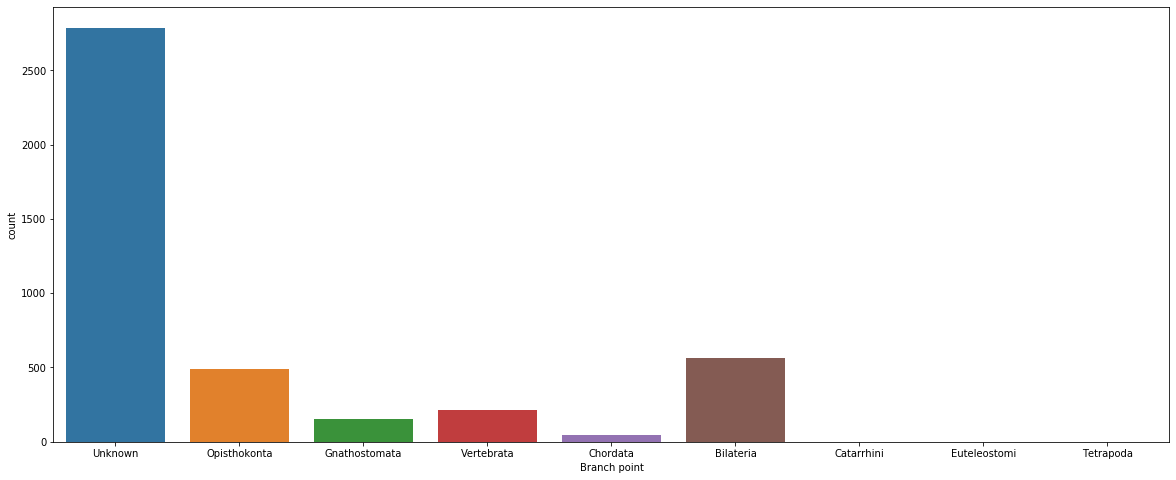

In [6]:
from seaborn import countplot
from matplotlib import pyplot
from pandas import DataFrame
fig, ax = pyplot.subplots(figsize=(20, 8))
ohnoframe = DataFrame.from_records([(k[0], k[1], v) for (k,v) in ohnologs.items()], columns=['lgene', 'rgene', 'Branch point'])
#ohnoframe
countplot(ax=ax, x="Branch point", data=ohnoframe)

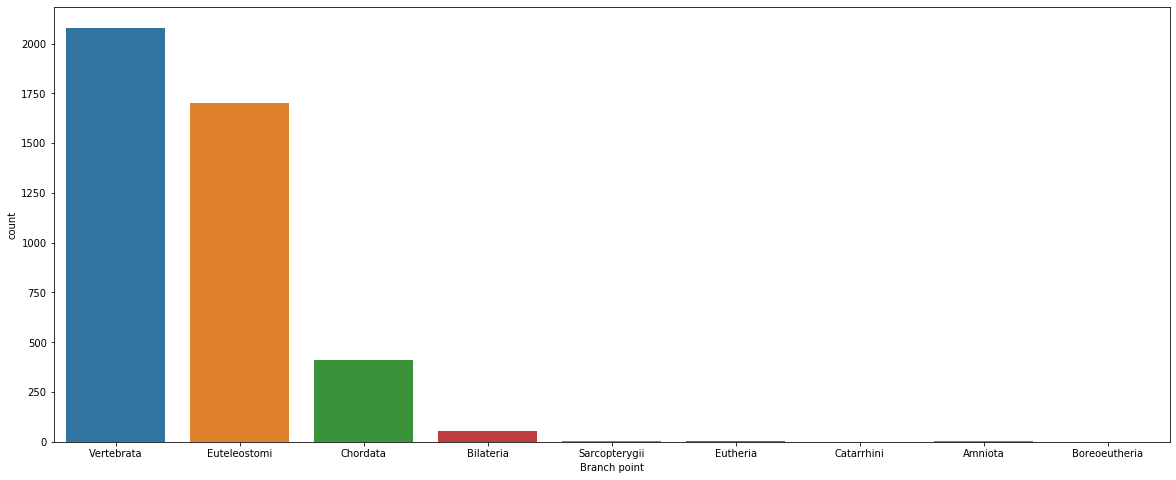

In [7]:
from seaborn import countplot
from matplotlib import pyplot
from pandas import DataFrame
fig, ax = pyplot.subplots(figsize=(20, 8))
ohnoframe_84 = DataFrame.from_records([(k[0], k[1], v) for (k,v) in ohnologs_84.items()], columns=['lgene', 'rgene', 'Branch point'])
#ohnoframe_84
countplot(ax=ax, x="Branch point", data=ohnoframe_84)

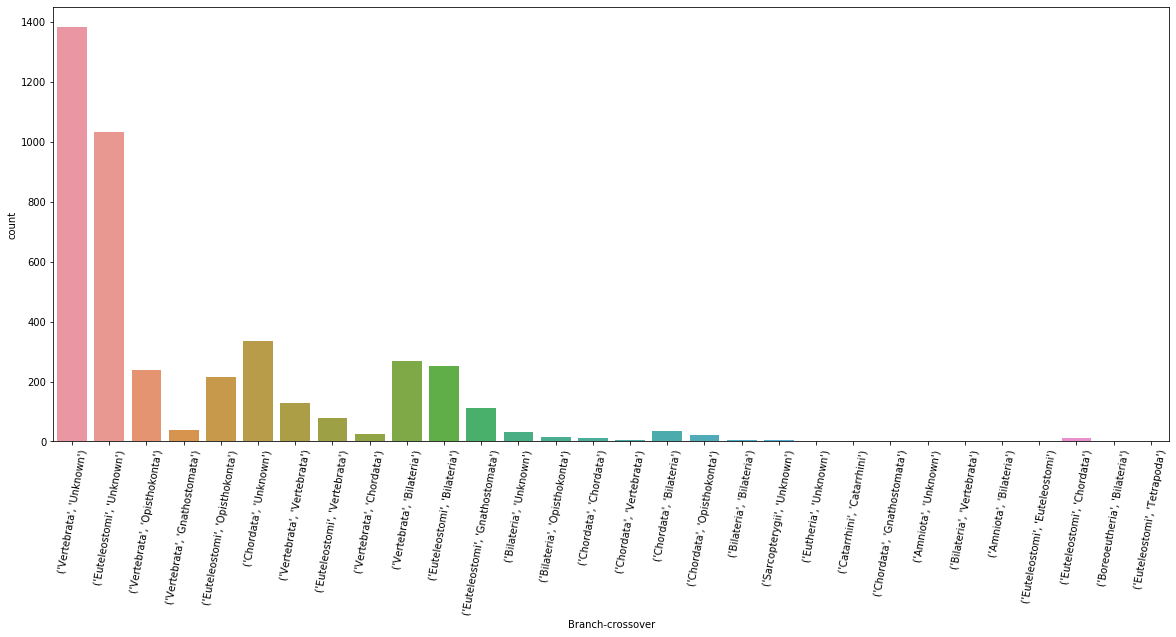

In [8]:
ohnoframe_cmp = DataFrame.from_records([(k[0], k[1], (ohnologs_84[k], ohnologs[k])) for k in ohnologs_84.keys()], columns=['lgene', 'rgene', 'Branch-crossover'])
fig, ax = pyplot.subplots(figsize=(20, 8))
#ohnoframe_cmp
pyplot.xticks(rotation=80)
countplot(ax=ax, x='Branch-crossover', data=ohnoframe_cmp)

In [9]:
import qgrid
import ipywidgets as widgets
widget=qgrid.show_grid(ohnoframe_cmp, show_toolbar=True)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
ohnoframe_cmp.to_csv('/home/gencpg/ohnoage.csv')